## **THEORY QUESTIONS**

### **Q1. What is Simple Linear Regression?**

**Answer**:

Simple linear regression (SLR) is a statistical method used to find a linear relationship between two continuous variables. It aims to model how a dependent variable, also known as the response variable, is affected by a single independent variable, also called the explanatory or predictor variable. The model is "simple" because it only involves one independent variable. The goal is to create a straight line that best fits the data, which can then be used to predict future outcomes or understand the strength and direction of the relationship.

It assumes a linear relationship between them, represented by the equation:

                             𝑌 =𝛽0 + 𝛽1𝑋 + 𝜖

Where:

* Y = dependent variable

* X = independent variable

* 𝛽0 = intercept
* β1 = slope coefficient
ϵ = error term

It is primarily used for prediction and trend estimation.


### **Q2. What are the key assumptions of Simple Linear Regression?**

**Answer**:

1. **Linearity**: Relationship between 𝑋 and 𝑌 is linear.

2. **Independence**: Observations are independent of each other.

3. **Homoscedasticity**: Constant variance of residuals across all values of 𝑋.

4. **Normality of Errors**: Residuals (errors) are normally distributed.

5. **No Multicollinearity**: Not applicable in simple regression (only one predictor).

### **Q3. What is heteroscedasticity, and why is it important to address in regression models?**

**Answer**:

Heteroscedasticity is a term used in regression analysis that describes a situation where the variance of the residuals (errors) is not constant across all levels of the independent variable(s). In simpler terms, it means the spread of the data points around the regression line is unequal; it might be tight in some areas and wide in others, often creating a "cone" or "fan" shape on a residual plot. This is a violation of one of the core assumptions of Ordinary Least Squares (OLS) regression, which assumes homoscedasticity, or constant variance.


**Why It's Important to Address**

Addressing heteroscedasticity is crucial because its presence can lead to misleading and unreliable regression results. While it doesn't cause the coefficient estimates themselves to be biased (the line is still a correct representation of the relationship), it does have significant negative impacts on the model's performance and the validity of statistical inferences.


* **Inefficient Coefficient Estimates**: The OLS estimator is no longer the "Best Linear Unbiased Estimator" (BLUE). This means that while the coefficient estimates are still unbiased, they are not as precise as they could be, making them less reliable.

* **Incorrect Standard Errors and P-values**: This is the most serious consequence. Heteroscedasticity causes the calculated standard errors of the coefficients to be biased. This, in turn, makes the p-values and confidence intervals unreliable. The standard errors are often underestimated, which can lead you to incorrectly conclude that a predictor variable is statistically significant when it might not be. This can lead to flawed conclusions and poor decision-making.

* **Invalid Hypothesis Tests**: Because the standard errors are biased, t-tests and F-tests—which rely on these standard errors—become invalid. You cannot trust the results of your hypothesis tests, making it difficult to determine the true relationships between variables.


### **Q4. What is Multiple Linear Regression?**

**Answer**:

Multiple linear regression is a statistical technique used to model the relationship between a single dependent variable and two or more independent variables. It extends simple linear regression, which only uses one independent variable. The goal is to find an equation that best predicts the value of the dependent variable based on the combined influence of all the independent variables.

**The Equation**

The equation for multiple linear regression is:

   y=β0 + β1x1 + β2x2 +...+βnxn + ϵ

* y is the dependent variable.

* x1 ,x2 ,...,xn are the independent variables.

* β0 is the y-intercept, the value of y when all independent variables are zero.

* β1 ,β2 ,...,βn are the regression coefficients (slopes) for each independent variable. Each coefficient represents the change in y for a one-unit change in that specific independent variable, while holding all other independent variables constant.

* ϵ is the error term.


### **Q5. What is polynomial regression, and how does it differ from linear regression?**

**Answer**:

Polynomial regression is a type of regression analysis where the relationship between the independent variable (x) and the dependent variable (y) is modeled as an nth-degree polynomial. It's used when the data points don't follow a straight line and instead show a curved or non-linear relationship.

The key idea is to transform the original independent variable by adding higher-degree terms, such as x2 , x3 , and so on. Even though the model fits a curve, it is still considered a form of linear regression because the equation is linear in its coefficients.

How It Differs from Linear Regression

The main difference between polynomial and linear regression is the nature of the relationship they can model:

* **Linear Regression** assumes a straight-line relationship between the variables. Its goal is to fit the best straight line to the data. This works well when the data shows a clear, consistent trend.

* **Polynomial Regression** is designed for data that has a curved or more complex pattern. It fits a curved line to the data, allowing it to capture non-linear trends.


## **PRACTICAL QUESTIONS**

### **Q6. Implement a Python program to fit a Simple Linear Regression model to the following sample data**:
● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

**Plot the regression line over the data points.**

**Answer**:

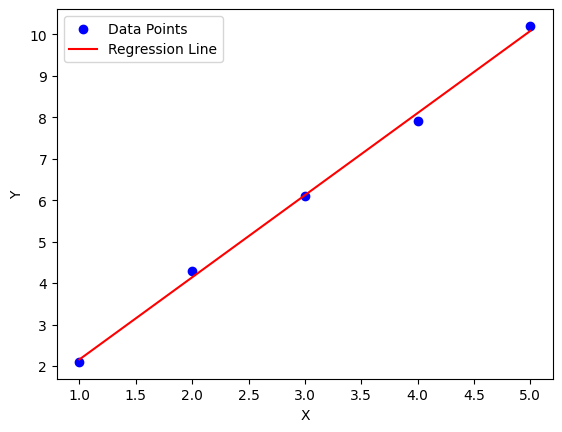

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])


model = LinearRegression()
model.fit(X, Y)


Y_pred = model.predict(X)


plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, Y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


### **Q7. Fit a Multiple Linear Regression model on this sample data**:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

**Check for multicollinearity using VIF and report the results**.

**Answer**:

In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

X = data[["Area", "Rooms"]]
y = data["Price"]

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()
print(model.summary())

vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Wed, 27 Aug 2025   Prob (F-statistic):             0.0377
Time:                        14:39:50   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### **Q8. Implement polynomial regression on the following data**:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

**Fit a 2nd-degree polynomial and plot the resulting curve**.

**Answer**:

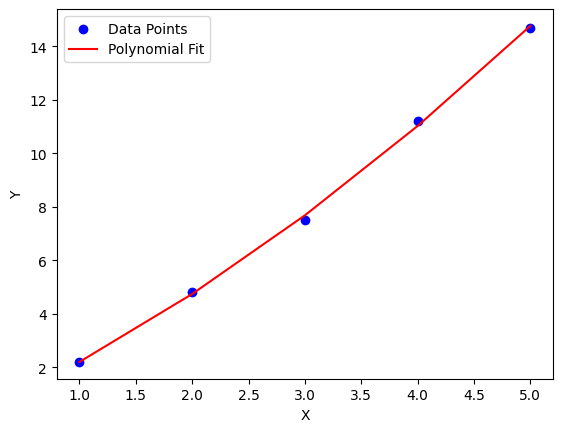

In [2]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, Y_pred, color="red", label="Polynomial Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


### **Q9. Create a residuals plot for a regression model trained on this data**:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

**Assess heteroscedasticity by examining the spread of residuals**.

**Answer**:

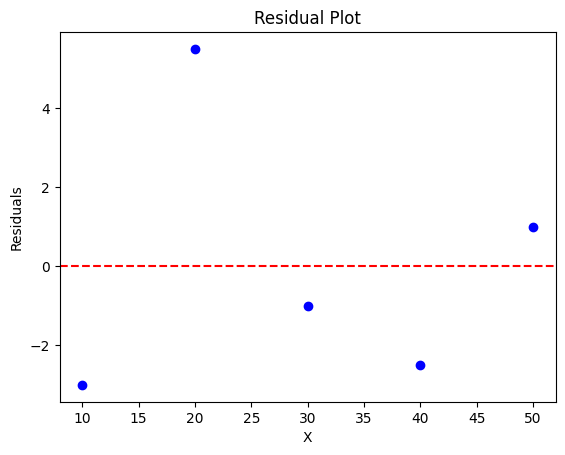

In [4]:

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.scatter(X, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


### **Q10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model**.

**Answer**:


As a data scientist building a house price prediction model, if I detect heteroscedasticity and multicollinearity, I would take the following steps:

**1. Addressing Heteroscedasticity (unequal variance of residuals)**:

* **Transform Variables**: Apply log or square root transformation on the dependent variable (Price) or features (Area, Rooms). For example, log(Price) often stabilizes variance.

* **Weighted Least Squares (WLS)**: Assign weights to data points inversely proportional to their variance.

* **Robust Regression**: Use regression methods that provide heteroscedasticity-consistent standard errors (e.g., statsmodels with HC3 robust covariance).

**2. Addressing Multicollinearity (high correlation among predictors)**:

* **Detect Multicollinearity**: Calculate Variance Inflation Factor (VIF) for each predictor. A VIF > 10 indicates high multicollinearity.

* **Remove or Combine Variables**: Drop one of the highly correlated features (e.g., if Area and Rooms are strongly correlated, keep only one).

* **Regularization Methods**: Use Ridge or Lasso Regression, which penalize large coefficients and reduce multicollinearity impact.

* **Dimensionality Reduction**: Apply Principal Component Analysis (PCA) to transform correlated features into uncorrelated components.

**3. Ensuring a Robust Model**

* Refit the model after applying transformations.

* Validate using residual plots and cross-validation.

* Choose the final model based on RMSE, R², and adjusted R².

**Example**:

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     26.51
Date:                Wed, 27 Aug 2025   Prob (F-statistic):             0.0116
Time:                        14:53:55   Log-Likelihood:                 18.186
No. Observations:                   7   AIC:                            -28.37
Df Residuals:                       3   BIC:                            -28.59
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.8204      0.535     22.

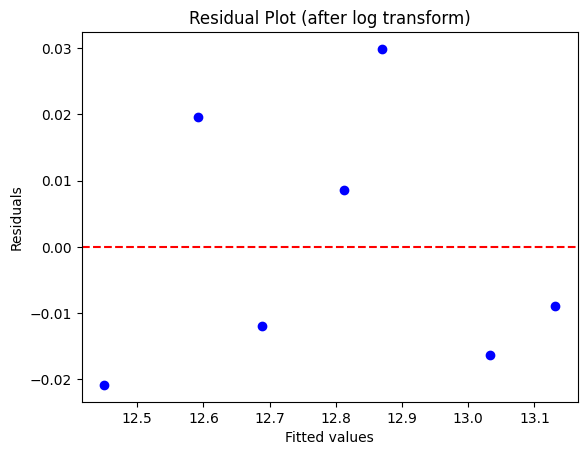

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import RidgeCV, LassoCV
import matplotlib.pyplot as plt

# Example dataset
data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000, 2200, 2500, 2800],
    "Rooms": [2, 3, 3, 4, 4, 5, 6],
    "Location_Score": [7, 8, 7, 9, 8, 10, 9],
    "Price": [250000, 300000, 320000, 370000, 400000, 450000, 500000]
})


data["Log_Price"] = np.log(data["Price"])

X = data[["Area", "Rooms", "Location_Score"]]
y = data["Log_Price"]

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit(cov_type='HC3')
print(model.summary())

vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\nVariance Inflation Factors:\n", vif)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 10)).fit(X, y)
lasso = LassoCV(cv=5).fit(X, y)

print("\nRidge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)

residuals = model.resid
plt.scatter(model.fittedvalues, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot (after log transform)")
plt.show()


**What this code does**:

1. Fixes heteroscedasticity by log-transforming Price.

2. Runs OLS regression with robust standard errors (HC3).

3. Checks multicollinearity using VIF.

4. Applies Ridge and Lasso regression to mitigate multicollinearity.

5. Plots residuals to ensure variance looks stable.